<a href="https://colab.research.google.com/github/charlesincharge/CS155/blob/revise-set-1/2022/sets/set1/src/3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts G-I: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts G-I by filling in the sections marked `# TODO` and running all cells.

In [2]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3G: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3D-F. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [3]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    
    loss_calc = 0
    for ind in range(len(X)):
        loss_calc += (np.dot(X[ind], w) - Y[ind])**2

    return loss_calc

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================    
    
    gradient = -2 * (y - np.dot(w, x)) * x
    return gradient

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    
    losses = []
    w_new = w_start
    indices = [*range(len(X))]

    for epoch in range(N_epochs):
        np.random.permutation(indices)
        

        for ind in range(len(X)):
            w_new = w_new - eta*gradient(X[indices[ind]], Y[indices[ind]], w_new)

        losses.append(loss(X, Y, w_new))

    return w_new, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [4]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [9]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/sgd_data.csv')
ones_col = np.array([1 for i in range(len(data))])
X = np.column_stack((ones_col, data[:,:4]))
Y = data[:, 4:]
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
eta = np.e**-15
N_epochs = 800
final_weight, _ = SGD(X, Y, w_start, eta, N_epochs)
print(final_weight)

[ -0.22720591  -5.94229011   3.94369494 -11.72402388   8.78549375]


## Problem 3H: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

Text(0.5, 1.0, 'Plotting SGD Convergence')

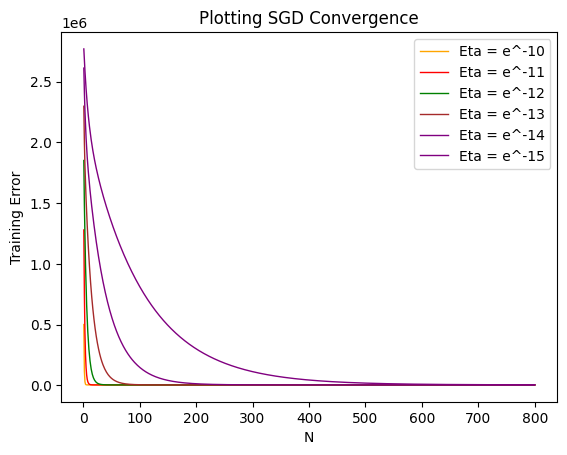

In [8]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================

colors = ['orange', 'red', 'green', 'brown', 'purple', 'purple']
eta_vals = [np.e**-10, np.e**-11, np.e**-12, np.e**-13, np.e**-14, np.e**-15]
losses = []
for i in range(len(eta_vals)):
    _, lossSGD = SGD(X, Y, w_start, eta_vals[i], N_epochs)
    losses.append(lossSGD)

plt.figure()
for i in range(len(eta_vals)):
    plt.plot([*range(1, N_epochs + 1)], losses[i], linewidth=1, color=colors[i])
plt.legend(["Eta = e^-" + str(exp) for exp in range(10, 16)])
plt.xlabel("N")
plt.ylabel("Training Error")
plt.title("Plotting SGD Convergence")

## Problem 3I

Provide your code for computing the least-squares analytical solution below.

In [50]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================
weights = []
x_matrix = np.zeros((len(X), len(X[0])))

for ind, input in enumerate(X):
    x_matrix[ind] = np.transpose(input)
        
x_trans = np.transpose(np.copy(x_matrix))
weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_trans, x_matrix)), x_trans), Y)
print(weights)


[[ -0.31644251]
 [ -5.99157048]
 [  4.01509955]
 [-11.93325972]
 [  8.99061096]]
